In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets,linear_model

In [4]:
data=pd.read_csv('test.csv')
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [5]:
data.shape

(9568, 5)

In [6]:
    X=data[['AT','V','AP','RH']]
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [7]:
y=data[['PE']]

In [8]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [10]:
print (X_train.shape)

(7176, 4)


In [11]:
from sklearn.linear_model import LinearRegression
9linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
linreg.intercept_

array([ 447.06297099])

In [13]:
linreg.coef_

array([[-1.97376045, -0.23229086,  0.0693515 , -0.15806957]])

In [14]:
y_pred=linreg.predict(X_test)
from sklearn import metrics
metrics.mean_squared_error(y_test,y_pred)
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

4.4811160665702356

In [1]:
fig, ax=plt.subplots()
ax.scatter(y_test,y_pred)
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

NameError: name 'plt' is not defined

In [34]:
from sklearn.model_selection import cross_val_predict
predicted=cross_val_predict(linreg,X,y,cv=1000)
np.sqrt(metrics.mean_squared_error(y,predicted))


4.5595212234410321

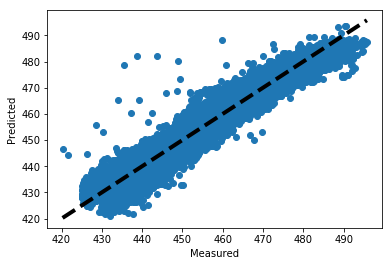

In [37]:
fig, ax=plt.subplots()
ax.scatter(y,predicted)
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()